In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
#Reading the Data-set
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking Null Values
print(diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.shape

(768, 9)

In [7]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
#Creating two datasets corresponding to 'has diabetes' and 'does not have diabetes' in order to explore better

negative = diabetes[diabetes.Outcome == 0]
postive = diabetes[diabetes.Outcome == 1]

In [9]:
postive.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,268.0,141.257463,31.939622,0.000,119.0000,140.000,167.000,199.00
BloodPressure,268.0,70.824627,21.491812,0.000,66.0000,74.000,82.000,114.00
SkinThickness,268.0,22.164179,17.679711,0.000,0.0000,27.000,36.000,99.00
Insulin,268.0,100.335821,138.689125,0.000,0.0000,0.000,167.250,846.00
BMI,268.0,35.142537,7.262967,0.000,30.8000,34.250,38.775,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00
Outcome,268.0,1.000000,0.000000,1.000,1.0000,1.000,1.000,1.00


In [10]:
negative.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,500.0,109.980000,26.141200,0.000,93.00000,107.000,125.00000,197.000
BloodPressure,500.0,68.184000,18.063075,0.000,62.00000,70.000,78.00000,122.000
SkinThickness,500.0,19.664000,14.889947,0.000,0.00000,21.000,31.00000,60.000
Insulin,500.0,68.792000,98.865289,0.000,0.00000,39.000,105.00000,744.000
BMI,500.0,30.304200,7.689855,0.000,25.40000,30.050,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000
Outcome,500.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000


We need to use stratified method in our validation in order to keep the same distribution in our train and test.

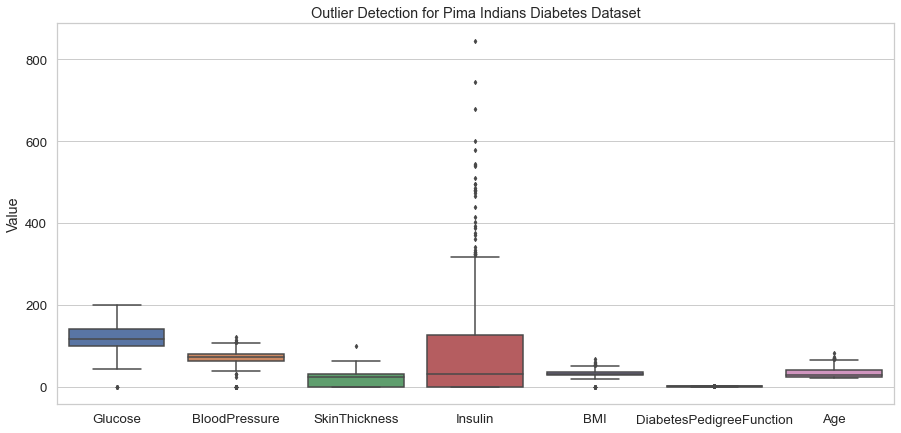

In [11]:
#Checking for Outliers in the DataSet
#Defining columns to be used in boxplot
subset_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin","BMI", "DiabetesPedigreeFunction","Age"]

#Create a box plot to visualize outliers for each selected variable
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data=diabetes[subset_cols], orient="v", ax=ax, fliersize=3)
ax.set_title("Outlier Detection for Pima Indians Diabetes Dataset")
ax.set_ylabel("Value")
plt.show()

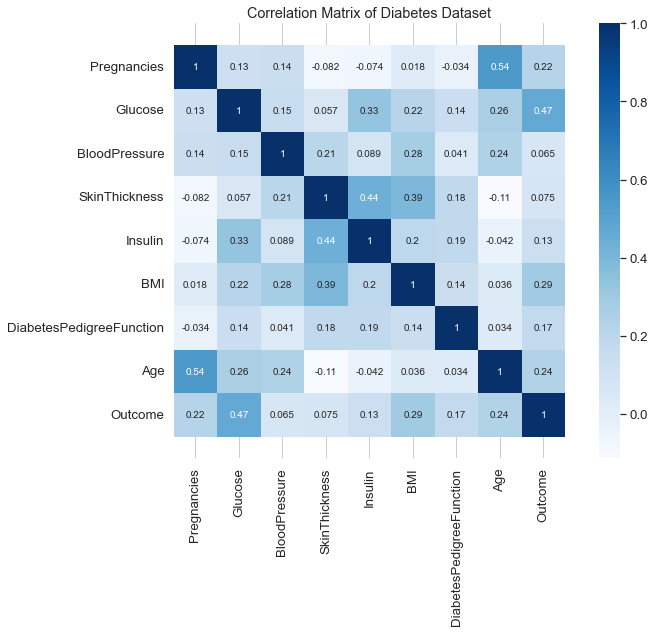

In [12]:
#Check for correlations in the diabetes dataset
corr_matrix = diabetes.corr()

#Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", square=True, ax=ax)

#heatmap cut-off
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#Display
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

There is not highly corrolated feature in this data set.

When we performed an initial data inspection, we noticed that some features had a value of 0. This may not be suitable for the given context and could indicate the existence of missing data.

In [13]:
#Create two subsets of the diabetes dataset based on 'Outcome'
positive = diabetes[diabetes["Outcome"] == 1] #has diabetes
negative = diabetes[diabetes["Outcome"] == 0] #does not have diabetes

In [14]:
positive = positive.replace({'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}, 
                            np.mean(positive[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]), 
                            inplace=False)
negative = negative.replace({'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}, 
                            np.mean(negative[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]), 
                            inplace=False)
#Seperately applying mean to the subset to minimise the data loss.

/Users/ratnapathak/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/ratnapathak/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [15]:
diabetes = pd.concat([positive, negative]) 
#Concating the results back to the original dataset

In [17]:
#Split the dataset into input features and target variable
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

In [18]:
#Split the dataset into train and test sets for model training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#To minimize information loss, we normalize our data by normalizing each set separately.

In [19]:
#Applying SMOTE to balance training data (only on training set to avoid data leakage)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [20]:
#Save the datasets as csv files
pd.DataFrame(X_test).to_csv('X_test.csv',index=False)
pd.DataFrame(y_test).to_csv('y_test.csv',index=False)

In [21]:
pd.DataFrame(X_train_smote).to_csv('X_train_smote.csv',index=False)
pd.DataFrame(y_train_smote).to_csv('y_train_smote.csv',index=False)